In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

# 데이터 입력
df = pd.read_csv('../dataset/sonar.csv')



1 Physical GPUs, 1 Logical GPUs


In [2]:
# 데이터 분류
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)


In [3]:

# 전체 데이터에서 학습 데이터와 테스트 데이터로 구분
X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y)  ## shuffle=True로 하면 데이터를 섞어서 나눔
## 학습 셋에서 학습과 검증 데이터로 구분
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True, stratify=Y_train1)  ## shuffle=True로 하면 데이터를 섞어서 나눔


In [4]:


# 모델의 설정
activation=tf.keras.activations.sigmoid
input_Layer = tf.keras.layers.Input(shape=(60,))
x = tf.keras.layers.Dense(120, activation=activation)(input_Layer)
x = tf.keras.layers.Dense(100, activation=activation)(input_Layer)
x = tf.keras.layers.Dense(50, activation=activation)(input_Layer)
Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [5]:

# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(lr=0.01)
metrics=tf.keras.metrics.binary_accuracy

model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])

## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
result=model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_valid,Y_valid)) # validation_data=(X_valid,Y_valid)을 추가하여 학습시 검증을 해줌.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 확인하여 무엇을 받고 있는지 확인.
print(result.history.keys())


/home/dalu/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
3/3 [==============================] - 1s 114ms/step - loss: 0.7354 - binary_accuracy: 0.4697 - val_loss: 0.7300 - val_binary_accuracy: 0.4545
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7231 - binary_accuracy: 0.4697 - val_loss: 0.7204 - val_binary_accuracy: 0.4545
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.7152 - binary_accuracy: 0.4697 - val_loss: 0.7131 - val_binary_accuracy: 0.4545
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7096 - binary_accuracy: 0.4697 - val_loss: 0.7079 - val_binary_accuracy: 0.4545
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.7048 - binary_accuracy: 0.4697 - val_loss: 0.7025 - val_binary_accuracy: 0.4545
Epoch 6/50
3/3 [==============================] - 0s 23ms/step - loss: 0.7001 - binary_accuracy: 0.4697 - val_loss: 0.6972 - val_binary_accuracy: 0.4545
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.6960 - b

2/2 [==============================] - 0s 3ms/step - loss: 0.6775 - binary_accuracy: 0.5476

 Test Accuracy: 0.5476


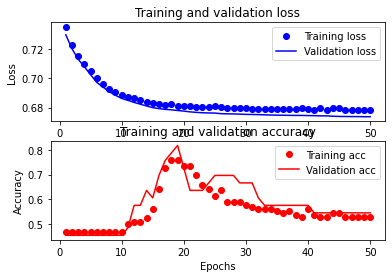

In [6]:

### result에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### result에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
acc = result.history['binary_accuracy']
val_acc = result.history['val_binary_accuracy']

### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# model.evalueate를 통해 테스트 데이터로 정확도 확인하기.
## model.evaluate(X_test, Y_test)의 리턴값은 [loss, binary_acuuracy ]  -> 위 model.compile에서 metrics=[ keras.metrics.binary_accuracy]옵션을 주어서 binary acuuracy 출력됨.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

## 그래프 띄우기
plt.show()



In [8]:
model.save('dal_sonar.h5')

In [10]:

# 전체 데이터에서 학습 데이터와 테스트 데이터로 구분
X_retrain1, X_retest, Y_retrain1, Y_retest = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y)  ## shuffle=True로 하면 데이터를 섞어서 나눔
## 학습 셋에서 학습과 검증 데이터로 구분
X_retrain, X_revalid, Y_retrain, Y_revalid = train_test_split(X_retrain1, Y_retrain1, test_size=0.2, shuffle=True, stratify=Y_retrain1)  ## shuffle=True로 하면 데이터를 섞어서 나눔


In [12]:
model_re=tf.keras.models.load_model('dal_sonar.h5')
model_re.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [14]:
result=model_re.fit(X_retrain, Y_retrain, epochs=200, batch_size=50, validation_data=(X_revalid,Y_revalid)) 

Epoch 1/200
3/3 [==============================] - 0s 84ms/step - loss: 0.6786 - binary_accuracy: 0.5303 - val_loss: 0.6758 - val_binary_accuracy: 0.5455
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 0.6785 - binary_accuracy: 0.5303 - val_loss: 0.6758 - val_binary_accuracy: 0.5455
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6786 - binary_accuracy: 0.5303 - val_loss: 0.6758 - val_binary_accuracy: 0.5455
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6785 - binary_accuracy: 0.5303 - val_loss: 0.6757 - val_binary_accuracy: 0.5455
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6783 - binary_accuracy: 0.5303 - val_loss: 0.6757 - val_binary_accuracy: 0.5455
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 0.6787 - binary_accuracy: 0.5303 - val_loss: 0.6756 - val_binary_accuracy: 0.5455
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.67